In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('/Users/mustafamuratarat/Downloads/Tensorflow-Bootcamp-master/02-TensorFlow-Basics/pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [6]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [15]:
#we have various continuous variables except 'Age', 'Class', 'Group'.
#we will convert age to categorial for the purpose of illustration
#we will choose columns to normalize
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [10]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x:(x - x.min())/(x.max() - x.min()))

In [12]:
diabetes[cols_to_norm].head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638


In [13]:
import tensorflow as tf

/Users/mustafamuratarat/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [14]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [25]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

# Categorical Features

In [17]:
#If you know the set of all possible feature values of a 
#column and there are only a few of them, you can use 
#categorical_column_with_vocabulary_list. 
#If you don't know the set of possible values in advance 
#you can use categorical_column_with_hash_bucket
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A','B','C','D'])

# Alternative
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

# Converting Continuous to Categorical

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

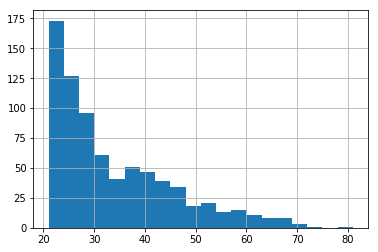

In [19]:
diabetes['Age'].hist(bins=20)

In [27]:
age_buckets = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

# Putting them together

In [28]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

In [29]:
x_data = diabetes.drop('Class', axis =1)

In [30]:
labels = diabetes['Class']

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [36]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train,batch_size=10, num_epochs=1000,shuffle=True)

In [37]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/t9/wrvs828j3qx2tvhc10_c8b400000gn/T/tmpu4y5eukf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a1bbf1400>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [38]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/t9/wrvs828j3qx2tvhc10_c8b400000gn/T/tmpu4y5eukf/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 323.908
INFO:tensorflow:loss = 5.0619035, step = 101 (0.311 sec)
INFO:tensorflow:global_step/sec: 500.048
INFO:tensorflow:loss = 6.0090475, step = 201 (0.200 sec)
INFO:tensorflow:global_step/sec: 465.584
INFO:tensorflow:loss = 7.1686006, step = 301 (0.216 sec)
INFO:tensorflow:global_step/sec: 459.449
INFO:tensorflow:loss = 6.5678496, step = 401 (0.217 sec)
INFO:tensorflow:global_step/sec: 472.896
INFO:tensorflow:loss = 6.318862, step = 501 (0.211 sec)
INFO:tensorflow:global_step/sec: 470.854
INFO:tensorflow:loss = 3.6534986, step = 601 (0.213 sec)
INFO:tensorflow:global_step/sec: 461.444
INFO:tensorflow:loss = 4.4148407, step = 701 (0.217 sec)
INFO:tensorflow:global_step/sec: 459.459
INFO:tensorflow:loss = 6.347781, step = 801 (0.217 sec)
INFO:tensorfl

In [39]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1,shuffle=False)

In [40]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-04-13-18:26:08
INFO:tensorflow:Restoring parameters from /var/folders/t9/wrvs828j3qx2tvhc10_c8b400000gn/T/tmpu4y5eukf/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-04-13-18:26:09
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.7945679, auc_precision_recall = 0.6351012, average_loss = 0.5297924, global_step = 1000, label/mean = 0.35064936, loss = 5.099252, prediction/mean = 0.35502636


In [42]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7945679,
 'auc_precision_recall': 0.6351012,
 'average_loss': 0.5297924,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.099252,
 'prediction/mean': 0.35502636}

In [44]:
#Let's predict using some new data points.
#Since we do not have new data, we will use test data
#not passing y values, we are predicting.
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=True)

In [46]:
predictions = model.predict(pred_input_func)
# Predictions is a generator! 

In [47]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from /var/folders/t9/wrvs828j3qx2tvhc10_c8b400000gn/T/tmpu4y5eukf/model.ckpt-1000


In [48]:
my_pred
#for first row, 0.6393489 , 0.36065114 are probabilities.

[{'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.3606511], dtype=float32),
  'logits': array([-0.5725392], dtype=float32),
  'probabilities': array([0.6393489 , 0.36065114], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5864526], dtype=float32),
  'logits': array([0.3493197], dtype=float32),
  'probabilities': array([0.4135474, 0.5864526], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.17793879], dtype=float32),
  'logits': array([-1.5303752], dtype=float32),
  'probabilities': array([0.82206124, 0.1779388 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.1252035], dtype=float32),
  'logits': array([-1.9440508], dtype=float32),
  'probabilities': array([0.87479645, 0.1252035 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object

# Dense Neural Network

In [50]:
#three layers, 10 neurons each
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/t9/wrvs828j3qx2tvhc10_c8b400000gn/T/tmpg66qb7x4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a1d8b1be0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [51]:
dnn_model.train(input_fn=input_func, steps=1000)
#You will get an error
#it requires dense columns.

ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [52]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [53]:
#Change assigned_group to embedded_group_col
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_col, age_buckets]

In [54]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train,batch_size=10, num_epochs=1000,shuffle=True)

In [55]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/t9/wrvs828j3qx2tvhc10_c8b400000gn/T/tmp19pxdd20', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x181b3b4278>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [56]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/t9/wrvs828j3qx2tvhc10_c8b400000gn/T/tmp19pxdd20/model.ckpt.
INFO:tensorflow:loss = 6.7672524, step = 1
INFO:tensorflow:global_step/sec: 367.358
INFO:tensorflow:loss = 5.6091723, step = 101 (0.274 sec)
INFO:tensorflow:global_step/sec: 485.552
INFO:tensorflow:loss = 6.5156317, step = 201 (0.211 sec)
INFO:tensorflow:global_step/sec: 473.878
INFO:tensorflow:loss = 5.5202727, step = 301 (0.210 sec)
INFO:tensorflow:global_step/sec: 494.417
INFO:tensorflow:loss = 3.5122895, step = 401 (0.200 sec)
INFO:tensorflow:global_step/sec: 504.422
INFO:tensorflow:loss = 4.0780334, step = 501 (0.196 sec)
INFO:tensorflow:global_step/sec: 505.578
INFO:tensorflow:loss = 5.2352495, step = 601 (0.198 sec)
INFO:tensorflow:global_step/sec: 499.085
INFO:tensorflow:loss = 4.6005344, step = 701 (0.201 sec)
INFO:tensorflow:global_step/sec: 501.384
INFO:tensorflow:loss = 3.8563592, step = 801 (0.199 sec)
INFO:tenso

In [57]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10,num_epochs=1,shuffle=False)

In [58]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-04-15-19:25:13
INFO:tensorflow:Restoring parameters from /var/folders/t9/wrvs828j3qx2tvhc10_c8b400000gn/T/tmp19pxdd20/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-04-15-19:25:14
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.75757575, accuracy_baseline = 0.64935064, auc = 0.81888896, auc_precision_recall = 0.6414321, average_loss = 0.49604326, global_step = 1000, label/mean = 0.35064936, loss = 4.7744164, prediction/mean = 0.32196158


{'accuracy': 0.75757575,
 'accuracy_baseline': 0.64935064,
 'auc': 0.81888896,
 'auc_precision_recall': 0.6414321,
 'average_loss': 0.49604326,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.7744164,
 'prediction/mean': 0.32196158}